# SFI 2024 - Rozwiązując korki
### Notebook 2 - Używanie OSMnx

W ramach tego notatnika nauczymy się korzystać z podstawowych funkcji takich bibliotek jak OSMnx (API między OSM na networkx), Folium (interaktywne mapy OSM przy pomocy Pythona) czy GeoPandas (rozszerzenie narzędzia do analizy danych dla GIS).

In [147]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolor
import numpy as np

import folium
import matplotlib

from math import isnan
from matplotlib import cm

Biblioteka OSMnx pozwala na łatwe używanie danych dostępnych w OpenStreetMaps. Dostarcza ona narzędzia do łatwego eksportu danych do formatu NetworkX czy GeoPandas.

Dzięki temu możemy otrzymać w jednej linijce graf dróg dla Krakowa.

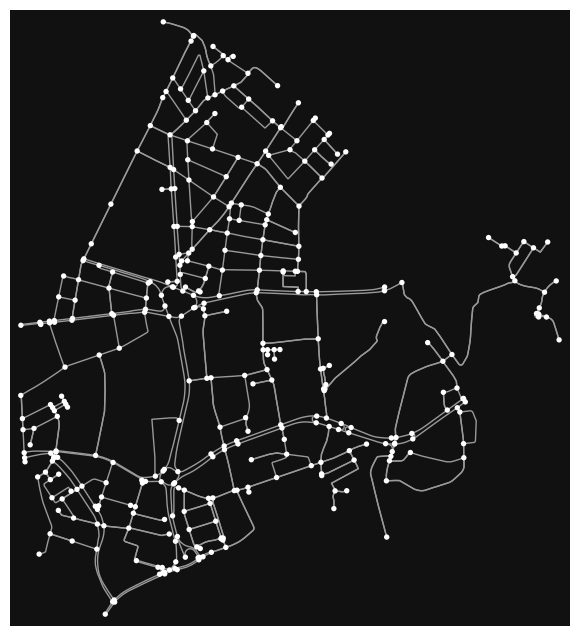

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [20]:
G_raw = ox.graph_from_place('Grzegórzki, Kraków', network_type='drive')
G_proj = ox.project_graph(G_raw)  # <-- Projekcja OSM, domyślnie estymuje heurystycznie najlepszą
ox.plot_graph(G_proj)

### Czy widzisz co jest nie tak z powyższą projekcją dzielnicy Grzegórzki (w kontekście analizy dróg)?
#### Spróbuj zrobić preprocessing dróg przy użyciu biblioteki OSMnx.

Podpowiedź:
[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.simplification.consolidate_intersections](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.simplification.consolidate_intersections)

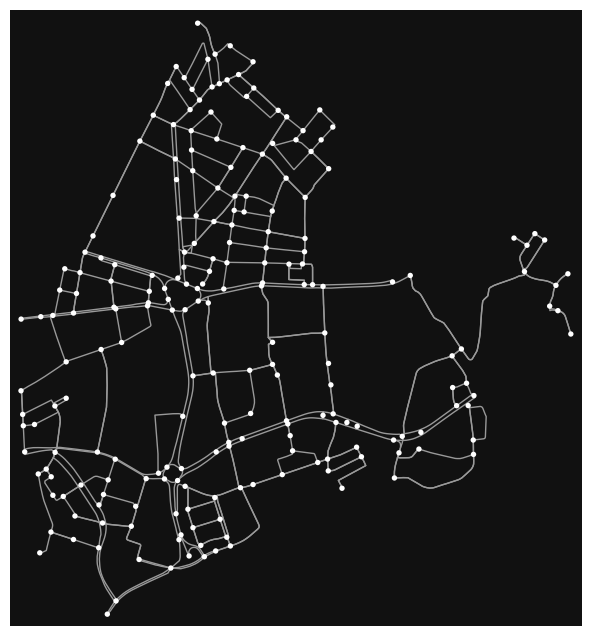

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [16]:
G = ???
ox.plot_graph(G)

***
# Eksploracja danych


#### Sprawdź, jakie atrybuty posiadają krawędzie oraz wierzchołki tego grafu. Czy są jakieś, które mają brakujące wartości? (Na/Null/None). Czy mamy jakieś wartości, które nie są liczbami?

Podpowiedź:
Możesz sprawdzić atrybuty tak jak w NetworkX (notebook 1), lub parsując graf na GeoPandas DataFrame.

[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_to_gdfs](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_to_gdfs)
[https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe](https://stackoverflow.com/questions/26266362/how-do-i-count-the-nan-values-in-a-column-in-pandas-dataframe)
[https://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas](https://stackoverflow.com/questions/21771133/finding-non-numeric-rows-in-dataframe-in-pandas)
[https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.isnumeric.html)

### Sprawdźmy dla jakich ulic występują brakujące wartości. 

W tym celu możemy wyindukować podgraf z G na podstawie krawędzi z brakującymi wartościami i go narysować.

Pamiętaj, że G to multiDiGraph, więc do dostępu do jego krawędzi są potrzebne aż 3 parametry! (u, v, key)

Podpowiedzi:
[https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.edge_subgraph.html)
[https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas](https://stackoverflow.com/questions/16031056/how-to-form-tuple-column-from-two-columns-in-pandas)

In [1]:
G_missing_sub = 

SyntaxError: invalid syntax (3064900367.py, line 1)

In [2]:
ox.plot_graph(G_missing_sub)

NameError: name 'ox' is not defined

### Rysowanie podgrafu wraz z mapą

In [107]:
_, sub_e = ox.graph_to_gdfs(G_missing_sub) 

m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

folium.GeoJson(sub_e, style_function=lambda x: {'fillColor': '#228B22', 'lineColor': '#228B22'}).add_to(m)

m

### Na podstawie mapy wybierz, jaka prędkość byłaby najlepsza dla ulic, które nie mają jej przypisanej i uzupełnij brakujące pola. Możesz to zrobić, korzystając z grafu NetworkX lub transformując graf do GeoPandas, robiąc processing danych i transformując dane spowrotem do grafu.

Dla wierszy z listą prędkości zaaplikuj najmniejszą prędkość.

Przydatne linki:
[https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_from_gdfs](https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.utils_graph.graph_from_gdfs)
[https://stackoverflow.com/questions/17051589/parsing-through-edges-in-networkx-graph](https://stackoverflow.com/questions/17051589/parsing-through-edges-in-networkx-graph)
[https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.fillna.html](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.fillna.html)
[https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html](https://pandas.pydata.org/docs/reference/api/pandas.Series.apply.html)

In [3]:
G_ready = ???

SyntaxError: invalid syntax (3272383040.py, line 1)

### Na koniec spróbujmy narysować pełną wizualizację naszego grafu, korzystając z biblioteki folium.
Stwórz dwie wizualizacje w celu sprawdzenia poprawności grafu. Jedną z drogami jedno- i dwukierunkowymi oraz drugą z dopuszczalnymi prędkościami.

In [4]:
# Pierwsza wizualizacja - wykorzystaj funkcję folium.GeoJson, przekazując do niej funkcję style_func, która w zależności od parametru oneway będzie zwracać słownik {'color': 'HEX_VALUE'}
m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

nodes, edges = ox.graph_to_gdfs(G_ready)

def basic_style_func(edge):
    if edge['properties']['oneway']:
        return {'color': '#ff0000'}
    return {'color': '#0000ff'}


folium.GeoJson(edges, style_function=basic_style_func).add_to(m)

m

NameError: name 'folium' is not defined

### Stworzenie drugiej mapy wymaga przydzielania kolorów do zmiennej ciągłej. W tym celu możemy wykorzystać colormapy z biblioteki matplotlib.

In [153]:
def get_cmap(vmin, vmax, cmap='viridis'):
    # Stwórz funkcję, która zwraca obiekt ScalarMappable z wybraną paletą i zakresem wartości
    # https://matplotlib.org/stable/api/cm_api.html#matplotlib.cm.ScalarMappable
    return None

In [155]:
def edge_embedding(hex_val):
    # Funkcja pomocniczna budująca słownik dla GeoJson
    return {'color': hex_val, 'weight': '3'}

In [156]:
def style_fun(e, vmin, vmax, attr='maxspeed', *_args):
    # Stwórz funkcję, która tworzy hex_val dla danej krawędzi
    # https://matplotlib.org/1.3.1/api/colors_api.html#matplotlib.colors.rgb2hex
    hex_val = None

    return edge_embedding(hex_val)

In [158]:
def get_value_range(_edges, attr):
    # Zwróć dwuelementową krotkę dla danego atrybutu z minimalną oraz maksymalną wartością
    return None, None

In [160]:
def edges_geojson(_edges, attr):
    # Zbuduj obiekt GeoJson
    vmin, vmax = ???

    return folium.GeoJson(_edges, style_function=???)

SyntaxError: invalid syntax (754413437.py, line 3)

In [162]:
m = folium.Map(location=ox.geocode('Grzegórzki, Kraków'), dragging=False, zoom_control=False, scrollWheelZoom=False,
               zoom_start=14)

edges_geojson(edges, 'maxspeed').add_to(m)

m

/var/folders/pg/gcgcl6m15fq2crqb0qflg3gm0000gn/T/ipykernel_19347/145632223.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(cmap)
